# nn 다중 분류 (흑백)
- Mnist dataset

## Import

In [6]:
!pip install --q ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 4.92 s (started: 2024-07-01 01:35:02 +00:00)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')

import seaborn as sns
import tensorflow as tf
import keras

time: 660 µs (started: 2024-07-01 01:35:07 +00:00)


## Data 불러오기

In [8]:
#!wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

time: 252 µs (started: 2024-07-01 01:35:07 +00:00)


In [9]:
mnist = np.load('/content/mnist.npz')
mnist

NpzFile '/content/mnist.npz' with keys: x_test, x_train, y_train, y_test

time: 4.33 ms (started: 2024-07-01 01:35:07 +00:00)


In [10]:
X_train = mnist['x_train']
X_test = mnist['x_test']
y_train = mnist['y_train']
y_test = mnist['y_test']

time: 248 ms (started: 2024-07-01 01:35:07 +00:00)


In [11]:
print(X_train.shape, X_test.shape, y_train.shape)
print(type(X_train),type(X_test),type(y_train))

(60000, 28, 28) (10000, 28, 28) (60000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 2.49 ms (started: 2024-07-01 01:35:08 +00:00)


### 데이터 확인

In [12]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

time: 2.96 ms (started: 2024-07-01 01:35:08 +00:00)


In [13]:
np.random.seed(42)
sample = np.random.randint(60000,size = 25)
sample

array([56422, 15795,   860, 38158, 54343, 44732, 11284, 54886,  6265,
       16850, 37194, 21962, 47191, 44131, 16023, 41090,  1685,   769,
       59735, 56101,  2433,  5311, 37819, 39188, 17568])

time: 3.18 ms (started: 2024-07-01 01:35:08 +00:00)


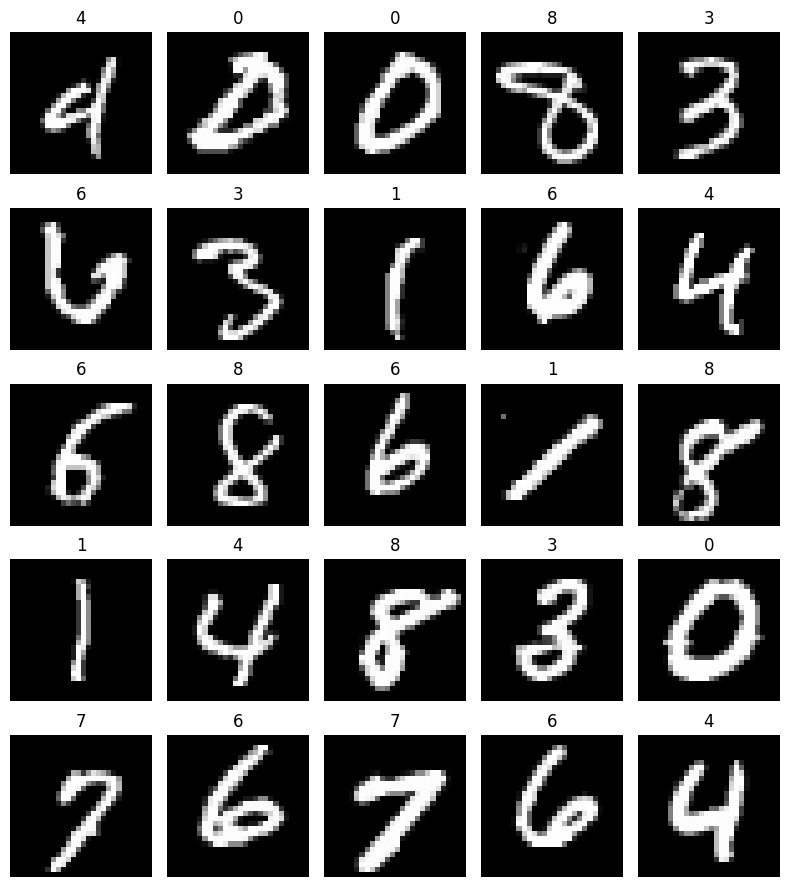

time: 2.47 s (started: 2024-07-01 01:35:08 +00:00)


In [14]:
plt.figure(figsize=(8,9))

for i, idx in enumerate(sample):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[idx], cmap='gray', )
    plt.axis('off')
    plt.title(y_train[idx])
plt.tight_layout()
plt.show()

In [15]:
y_values = pd.Series(y_train).value_counts().sort_index()

time: 36.7 ms (started: 2024-07-01 01:35:10 +00:00)


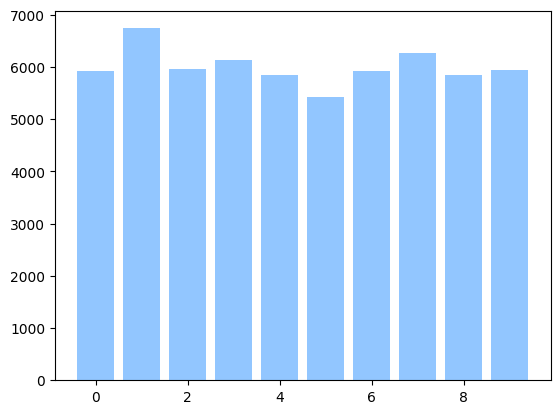

time: 291 ms (started: 2024-07-01 01:35:10 +00:00)


In [16]:
plt.bar(y_values.index, y_values)
plt.show()

## 학습, 검증 데이터 분할

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)
time: 426 ms (started: 2024-07-01 01:35:10 +00:00)


## 데이터 전처리
- X 값 스케일링
- y 값 원-핫 인코딩

### X 값 스케일링

In [18]:
from sklearn.preprocessing import MinMaxScaler

X_train_s = X_train / 255.
X_val_s = X_val / 255.

time: 276 ms (started: 2024-07-01 01:35:11 +00:00)


In [19]:
X_train_s.shape, X_val_s.shape

((48000, 28, 28), (12000, 28, 28))

time: 2.44 ms (started: 2024-07-01 01:35:11 +00:00)


### y 값 원-핫 인코딩

In [20]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

time: 3.03 ms (started: 2024-07-01 01:35:11 +00:00)


In [21]:
y_train_o.shape, y_val_o.shape

((48000, 10), (12000, 10))

time: 5.96 ms (started: 2024-07-01 01:35:11 +00:00)


## Model 학습

In [22]:
X_train_s.shape

(48000, 28, 28)

time: 5.83 ms (started: 2024-07-01 01:35:11 +00:00)


In [23]:
# 2차원 데이터 학습위해 1차원으로 변경
X_train_s = X_train_s.reshape(-1,28*28)
X_val_s = X_val_s.reshape(-1,28*28)

time: 426 µs (started: 2024-07-01 01:35:11 +00:00)


In [24]:
len(X_train_s[0])

784

time: 2.56 ms (started: 2024-07-01 01:35:11 +00:00)


In [25]:
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 1.15 s (started: 2024-07-01 01:35:11 +00:00)


In [26]:
adam = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])

time: 90.6 ms (started: 2024-07-01 01:35:12 +00:00)


In [27]:
X_train_s.shape, y_train_o.shape

((48000, 784), (48000, 10))

time: 8.64 ms (started: 2024-07-01 01:35:13 +00:00)


In [28]:
X_val_s.shape, y_val_o.shape

((12000, 784), (12000, 10))

time: 5.91 ms (started: 2024-07-01 01:35:13 +00:00)


In [29]:
EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(X_train_s,y_train_o, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_s,y_val_o))

Epoch 1/30
1500/1500 [==============================] - 18s 8ms/step - loss: 0.3181 - acc: 0.9063 - val_loss: 0.1978 - val_acc: 0.9451
Epoch 2/30
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1868 - acc: 0.9477 - val_loss: 0.1793 - val_acc: 0.9504
Epoch 3/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1652 - acc: 0.9554 - val_loss: 0.1941 - val_acc: 0.9491
Epoch 4/30
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1470 - acc: 0.9605 - val_loss: 0.1497 - val_acc: 0.9602
Epoch 5/30
1500/1500 [==============================] - 11s 8ms/step - loss: 0.1440 - acc: 0.9621 - val_loss: 0.1574 - val_acc: 0.9598
Epoch 6/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1271 - acc: 0.9672 - val_loss: 0.1679 - val_acc: 0.9600
Epoch 7/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1181 - acc: 0.9693 - val_loss: 0.1528 - val_acc: 0.9634
Epoch 8/30
1500/1500 [==============================] - 7s 

## test data 예측

In [30]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

time: 2.99 ms (started: 2024-07-01 01:39:38 +00:00)


In [31]:
X_test_s = X_test / 255.
X_test_s = X_test_s.reshape(-1,784)

time: 24.2 ms (started: 2024-07-01 01:39:38 +00:00)


In [37]:
X_test_s.shape

(10000, 784)

time: 3.82 ms (started: 2024-07-01 01:40:17 +00:00)


In [42]:
y_pred = model.predict(X_test_s)

313/313 [==============================] - 1s 4ms/step
time: 1.86 s (started: 2024-07-01 01:42:35 +00:00)


In [43]:
y_pred

array([[0.0000000e+00, 1.9552438e-19, 4.0597814e-18, ..., 1.0000000e+00,
        1.3608151e-35, 7.1657944e-14],
       [7.9127659e-23, 1.6156397e-18, 1.0000000e+00, ..., 5.8713619e-18,
        4.3987569e-25, 0.0000000e+00],
       [1.8711266e-17, 9.9983656e-01, 1.7296278e-10, ..., 1.6327976e-04,
        7.3744303e-08, 5.5604496e-13],
       ...,
       [1.3936426e-22, 4.8391939e-22, 2.2816865e-19, ..., 2.6031897e-15,
        3.8080637e-21, 2.2573951e-10],
       [0.0000000e+00, 7.3013165e-33, 0.0000000e+00, ..., 0.0000000e+00,
        1.5099392e-26, 8.0379383e-20],
       [2.0292439e-25, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        6.1263709e-31, 0.0000000e+00]], dtype=float32)

time: 17.8 ms (started: 2024-07-01 01:42:36 +00:00)


In [44]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

time: 1.07 ms (started: 2024-07-01 01:42:36 +00:00)


### 결과 비교

In [47]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy : ', accuracy_score(y_true, y_pred))
    print('recall : ', recall_score(y_true, y_pred, average=aver))
    print('precision : ', precision_score(y_true, y_pred, average=aver))
    print('f1 : ', f1_score(y_true, y_pred, average=aver))
    print('-----'*11)
    cfm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize = (5,5))
    s = sns.heatmap(cfm, annot=True, fmt='d', cbar=False, cmap='Purples')
    s.set(xlabel='Predcition', ylabel='Actual')
    plt.show()

time: 1.34 ms (started: 2024-07-01 01:42:57 +00:00)


accuracy :  0.9646
recall :  0.9644987008506609
precision :  0.9647492237148478
f1 :  0.9644247609089917
-------------------------------------------------------


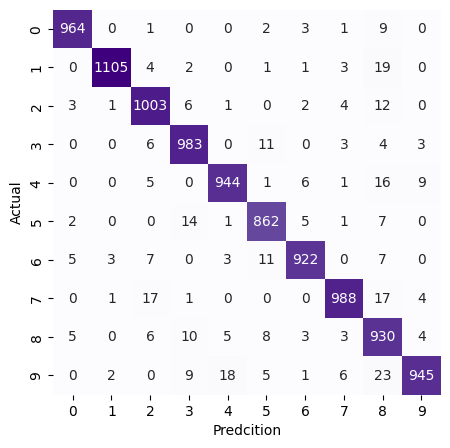

time: 608 ms (started: 2024-07-01 01:42:58 +00:00)


In [48]:
print_metrics(y_test,y_pred,'macro')

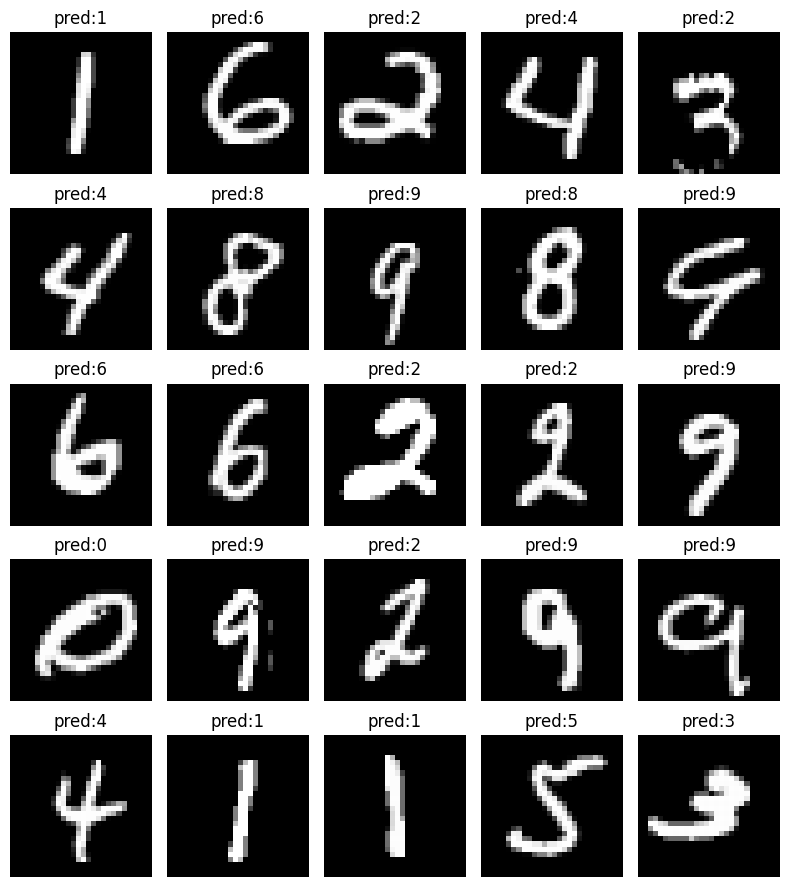

time: 2.02 s (started: 2024-07-01 01:44:03 +00:00)


In [50]:
np.random.seed(42)
sample = np.random.randint(10000,size = 25)
sample

plt.figure(figsize=(8,9))

for i, idx in enumerate(sample):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[idx], cmap='gray', )
    plt.axis('off')
    plt.title(f'pred:{y_pred[idx]}')
plt.tight_layout()
plt.show()